Download the Iris flower dataset. Perform following using R programming:

In [20]:
library(datasets)
require(ggplot2)
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



a. How many features are there and what are their types (e.g., numeric, nominal)






In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


b. Compute and display summary statistics for each feature available in the dataset. (eg. minimum value, maximum value, mean, range, standard deviation,  variance and percentiles.)




In [3]:
mean(iris$Sepal.Width)
median(iris$Sepal.Width)
min(iris$Sepal.Width)
max(iris$Sepal.Width)
range(iris$Sepal.Width)
sd(iris$Sepal.Width)
IQR(iris$Sepal.Width)
var(iris$Sepal.Width)

[1] 3.057333

[1] 3

[1] 2

[1] 4.4

[1] 2.0 4.4

[1] 0.4358663

[1] 0.5

[1] 0.1899794

c. Handle Missing Values- Check whether missing values are present in data set. If yes, handle those missing values.




In [15]:
any(is.na(iris))

[1] FALSE

d. Data Visualization-Create a histogram for each feature in the dataset to illustrate the feature distributions. Plot each histogram. 





`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


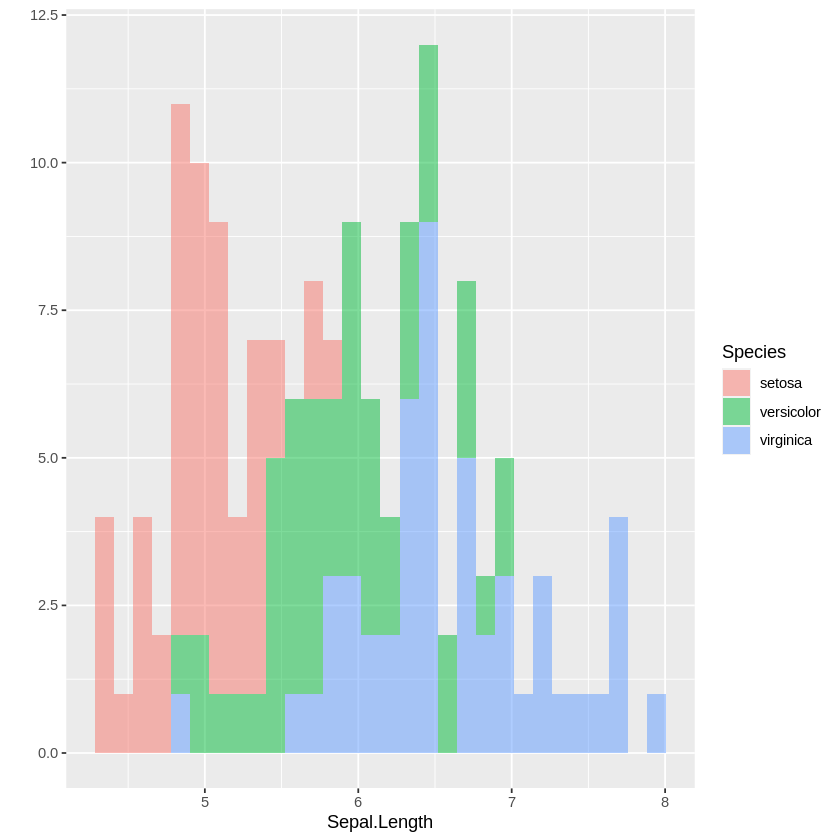

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


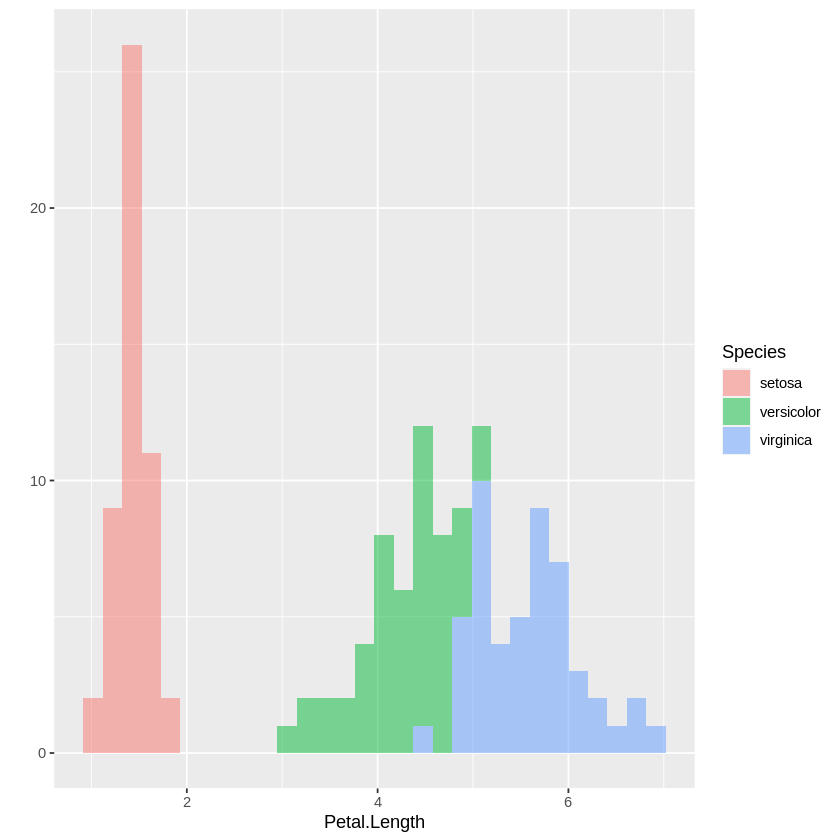

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


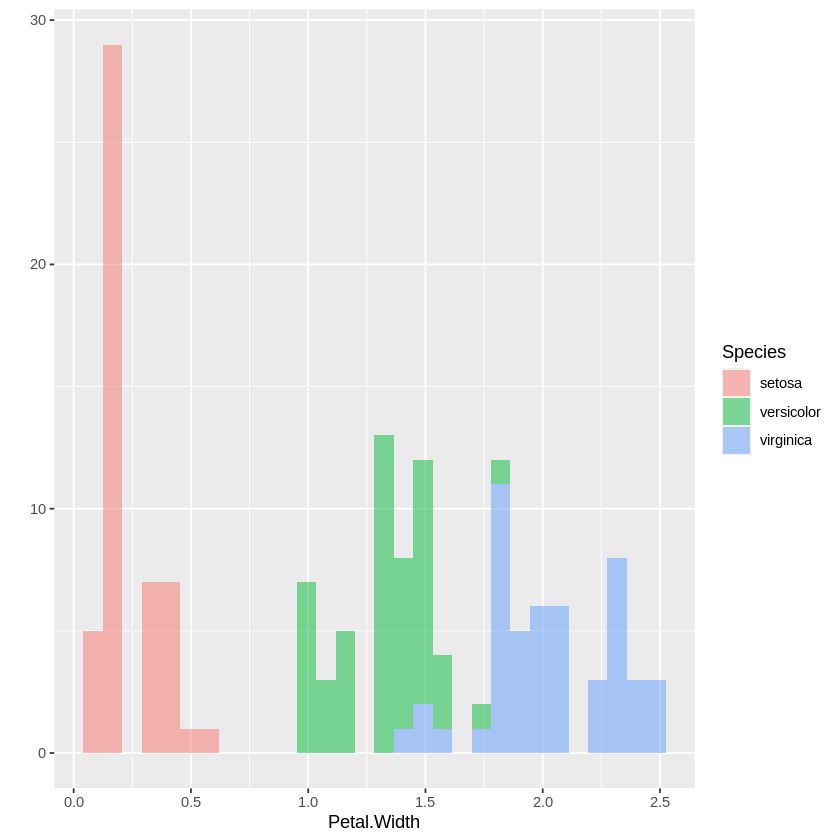

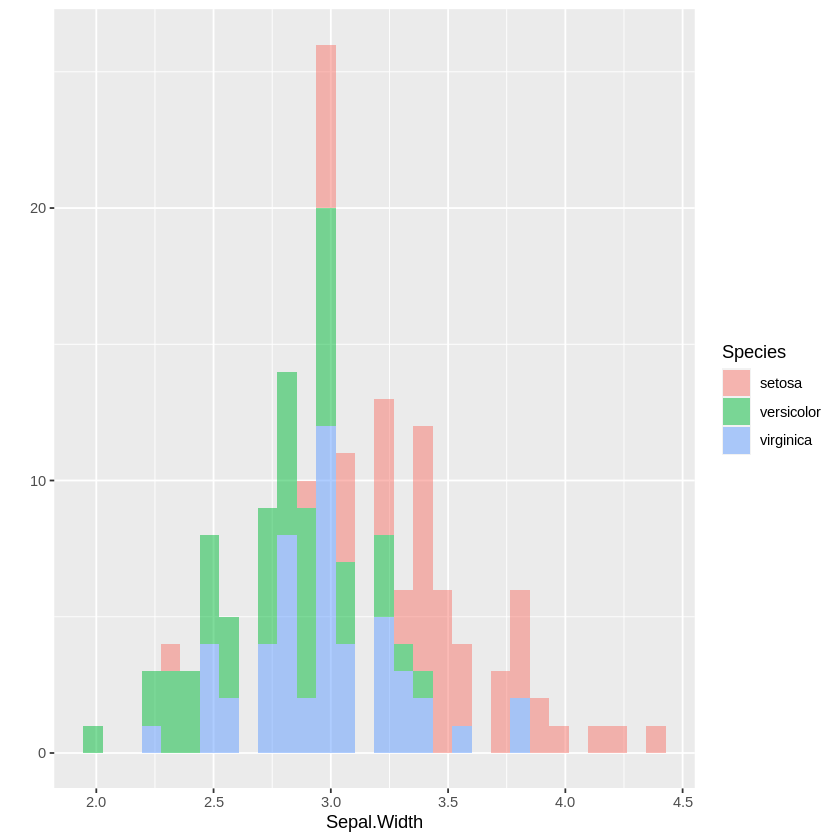

In [7]:
qplot(Sepal.Length, data=iris, geom='histogram', fill=Species, alpha=I(1/2))
qplot(Petal.Length, data=iris, geom='histogram', fill=Species, alpha=I(1/2))
qplot(Petal.Width, data=iris, geom='histogram', fill=Species, alpha=I(1/2))
qplot(Sepal.Width, data=iris, geom='histogram', fill=Species, alpha=I(1/2))

e. Identify the relationship between sepal-length and sepal-width, also petal-length and petal-width. Show it using scatterplot. Place the legend outside the figure.




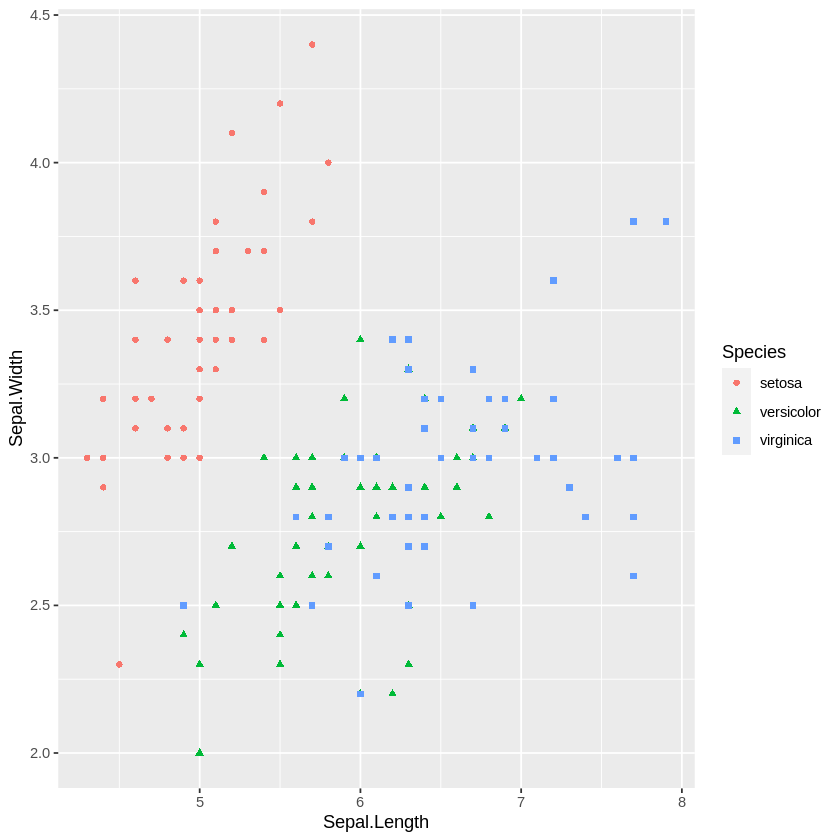

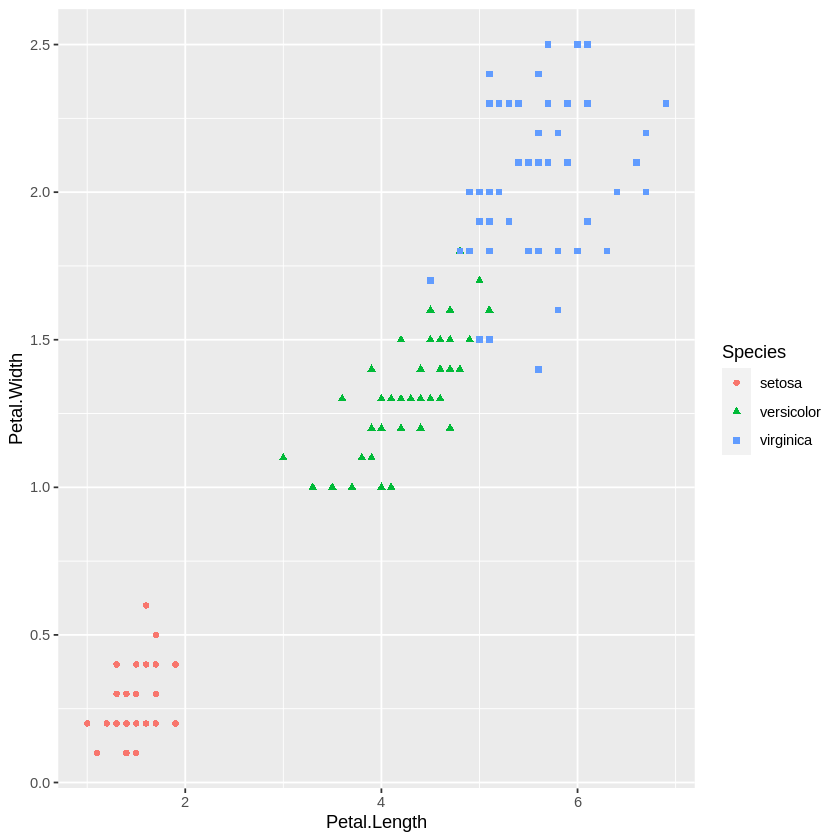

In [9]:
ggplot(data = iris) + aes(x = Sepal.Length, y = Sepal.Width) + geom_point(aes(color = Species, shape = Species))
ggplot(data = iris) + aes(x = Petal.Length, y = Petal.Width) + geom_point(aes(color = Species, shape = Species))


f. Create a boxplot for each feature in the dataset. All of the boxplots should be combined into a single plot. Compare distributions.




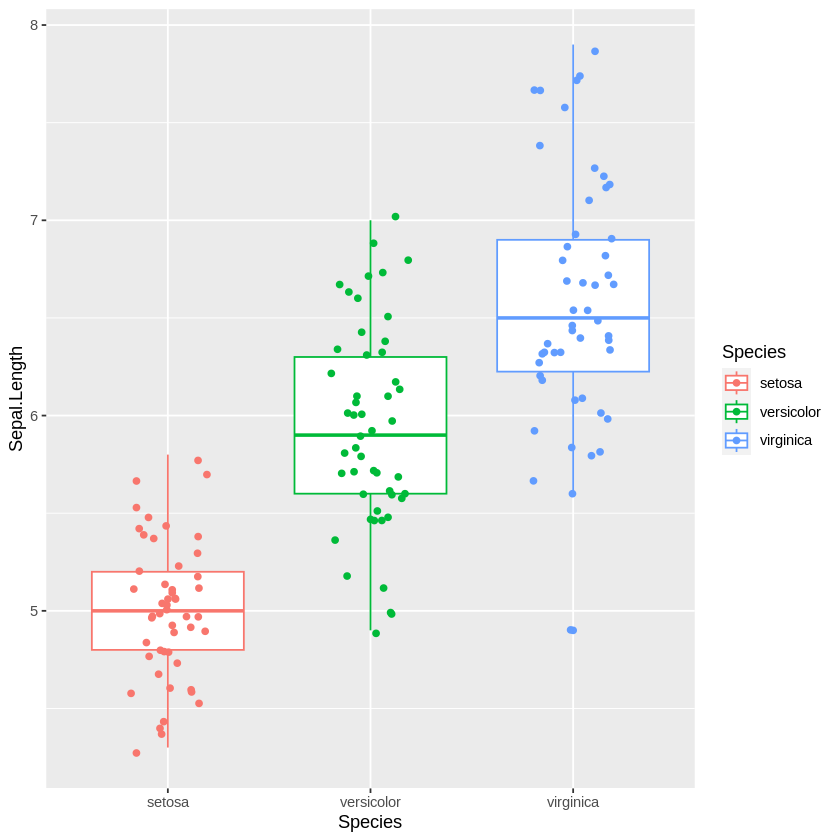

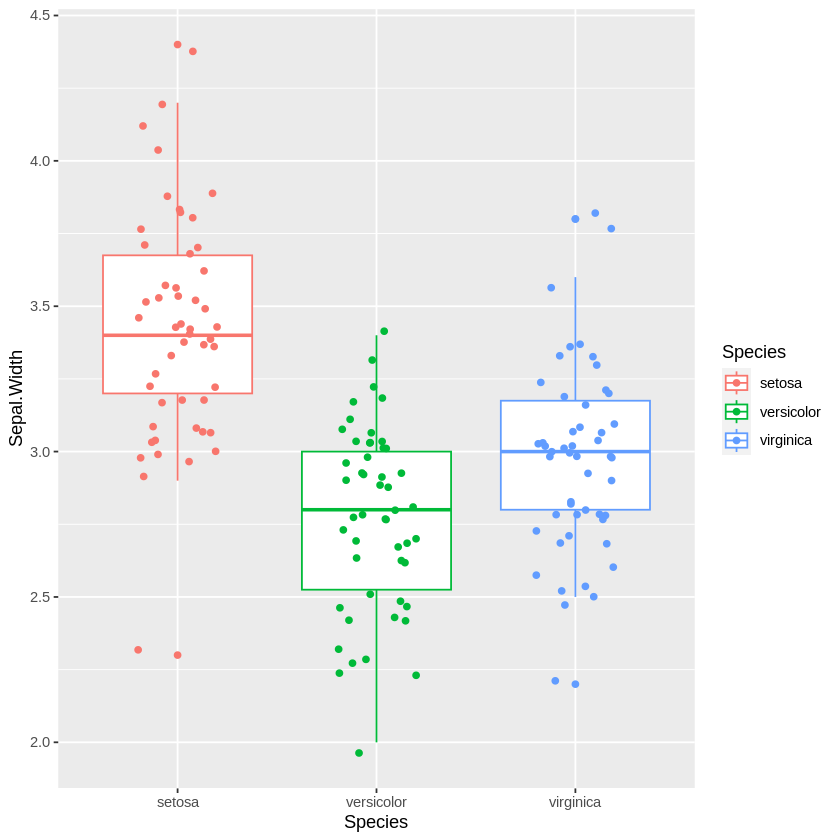

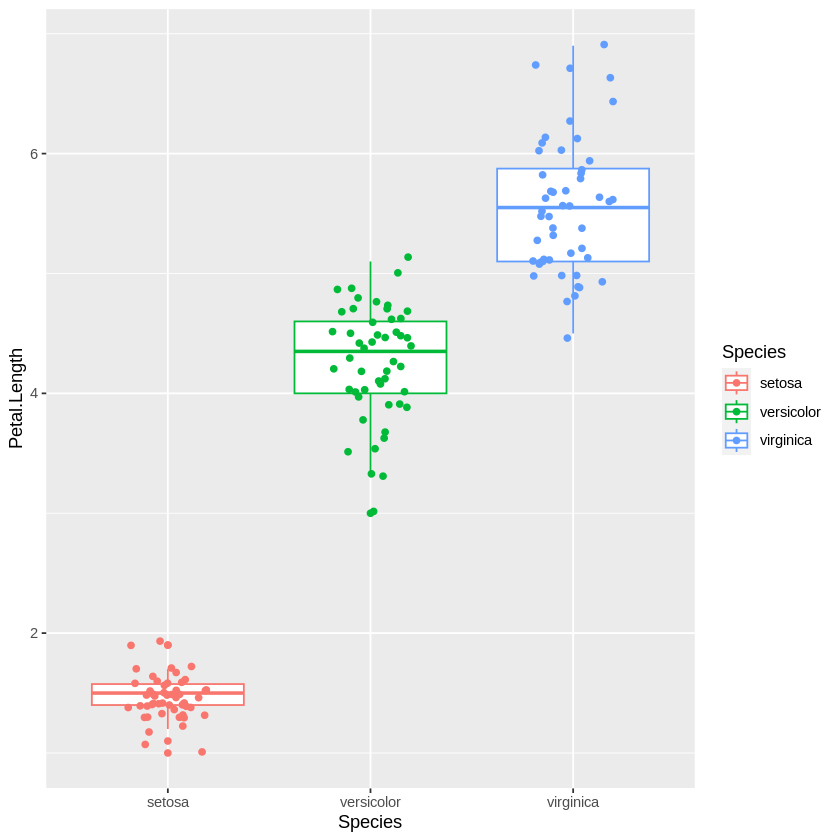

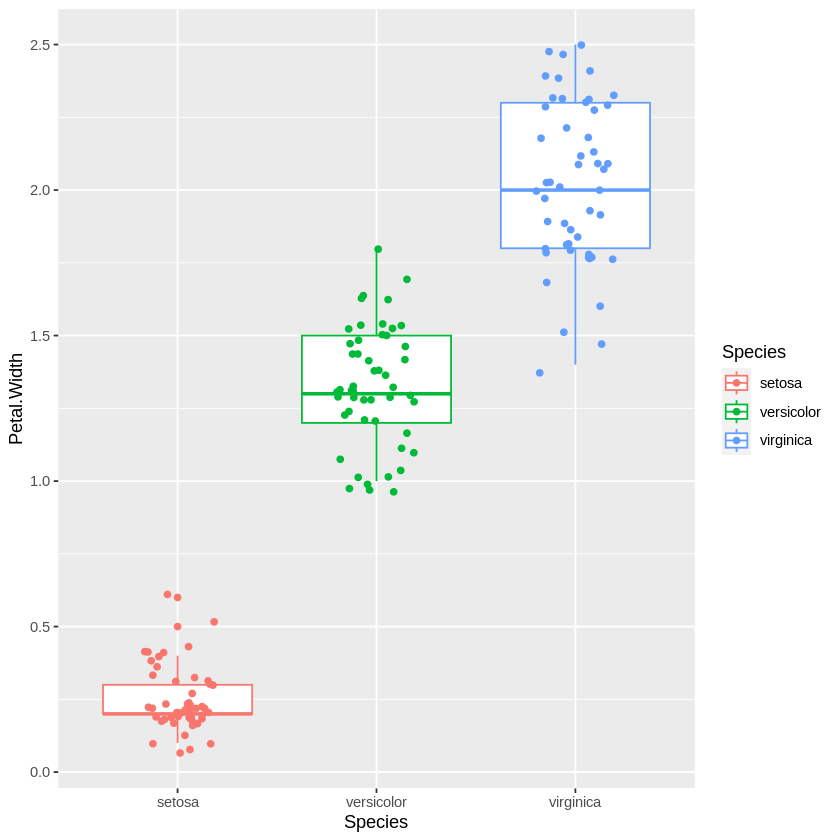

In [10]:
ggplot(data = iris) + aes(x = Species, y = Sepal.Length, color = Species) + geom_boxplot() + geom_jitter(position = position_jitter(0.2))
ggplot(data = iris) + aes(x = Species, y = Sepal.Width, color = Species) + geom_boxplot() + geom_jitter(position = position_jitter(0.2))
ggplot(data = iris) + aes(x = Species, y = Petal.Length, color = Species) + geom_boxplot() + geom_jitter(position = position_jitter(0.2))
ggplot(data = iris) + aes(x = Species, y = Petal.Width, color = Species) + geom_boxplot() + geom_jitter(position = position_jitter(0.2))

g. Identify outliers. Handle those outliers.

In [22]:
library(plyr)
suppressPackageStartupMessages(library(dplyr))
table(iris$Species)
table(iris$Sepal.Width)
outlier_limits <- iris %>% 
  ddply(.(Species), summarise,
        Q1 = quantile(Petal.Length, probs = 0.25),
        Q3 = quantile(Petal.Length, probs = 0.75),
        IQR = Q3 - Q1,
        upper_inner_limit = Q3 + 1.5 * IQR,
        lower_inner_limit = Q1 - 1.5 * IQR)
outlier_limits
iris <- left_join(iris, outlier_limits, by = "Species") %>% 
  select (-Q1, -Q3, -IQR)
iris %>% head() %>% table()
iris$Petal.Length.Outlier <- ifelse(iris$Petal.Length > iris$lower_inner_limit & 
                                      iris$Petal.Length < iris$upper_inner_limit, "no outlier", "outlier")
iris %>% filter(Petal.Length.Outlier == "outlier") %>% table()


    setosa versicolor  virginica 
        50         50         50 


  2 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9   3 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9   4 
  1   3   4   3   8   5   9  14  10  26  11  13   6  12   6   4   3   6   2   1 
4.1 4.2 4.4 
  1   1   1 

Species,Q1,Q3,IQR,upper_inner_limit,lower_inner_limit
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,1.4,1.575,0.175,1.8375,1.1375
versicolor,4.0,4.600,0.600,5.5000,3.1000
virginica,5.1,5.875,0.775,7.0375,3.9375


, , Petal.Length = 1.3, Petal.Width = 0.2, Species = setosa, upper_inner_limit.x = 1.8375, lower_inner_limit.x = 1.1375, Petal.Length.Outlier = no outlier, upper_inner_limit.y = 1.8375, lower_inner_limit.y = 1.1375, upper_inner_limit = 1.8375, lower_inner_limit = 1.1375

            Sepal.Width
Sepal.Length 3 3.1 3.2 3.5 3.6 3.9
         4.6 0   0   0   0   0   0
         4.7 0   0   1   0   0   0
         4.9 0   0   0   0   0   0
         5   0   0   0   0   0   0
         5.1 0   0   0   0   0   0
         5.4 0   0   0   0   0   0

, , Petal.Length = 1.4, Petal.Width = 0.2, Species = setosa, upper_inner_limit.x = 1.8375, lower_inner_limit.x = 1.1375, Petal.Length.Outlier = no outlier, upper_inner_limit.y = 1.8375, lower_inner_limit.y = 1.1375, upper_inner_limit = 1.8375, lower_inner_limit = 1.1375

            Sepal.Width
Sepal.Length 3 3.1 3.2 3.5 3.6 3.9
         4.6 0   0   0   0   0   0
         4.7 0   0   0   0   0   0
         4.9 1   0   0   0   0   0
         5   0   0   0

, , Petal.Length = 1, Petal.Width = 0.1, Species = setosa, upper_inner_limit.x = 1.8375, lower_inner_limit.x = 1.1375, Petal.Length.Outlier = outlier, upper_inner_limit.y = 1.8375, lower_inner_limit.y = 1.1375, upper_inner_limit = 1.8375, lower_inner_limit = 1.1375

            Sepal.Width
Sepal.Length 2.5 3 3.4 3.6 3.8
         4.3   0 0   0   0   0
         4.6   0 0   0   0   0
         4.8   0 0   0   0   0
         5.1   0 0   0   0   0

, , Petal.Length = 1.1, Petal.Width = 0.1, Species = setosa, upper_inner_limit.x = 1.8375, lower_inner_limit.x = 1.1375, Petal.Length.Outlier = outlier, upper_inner_limit.y = 1.8375, lower_inner_limit.y = 1.1375, upper_inner_limit = 1.8375, lower_inner_limit = 1.1375

            Sepal.Width
Sepal.Length 2.5 3 3.4 3.6 3.8
         4.3   0 1   0   0   0
         4.6   0 0   0   0   0
         4.8   0 0   0   0   0
         5.1   0 0   0   0   0

, , Petal.Length = 1.9, Petal.Width = 0.1, Species = setosa, upper_inner_limit.x = 1.8375, lower_inner_l